<a href="https://colab.research.google.com/github/Gin-Arata/PCVK_13_Gaco-Razan-Kamil/blob/main/Week5_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive

## Mounting Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Praktikum 1

Gamma correction pada citra
---------------------------
Masukkan nilai gamma: 3


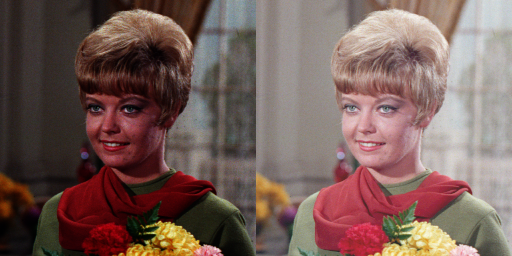

In [8]:
print("Gamma correction pada citra")
print("---------------------------")

# Menerima input user
try:
  gamma = int(input("Masukkan nilai gamma: "))
except ValueError:
  print("Input harus berupa angka")

# Load Image
img_gamma = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/female.tiff')

# Melakukan gamma correction
# Melakukan inverse gamma untuk melakukan koreksi
inv_gamma = 1 / gamma

# Normalisasi image
img_normalized = img_gamma / 255

# Melakukan penambahan gamma
img_gamma_correction = np.power(img_normalized, inv_gamma)

# Melakukan denormalisasi img gamma
img_gamma_correction = np.uint8(img_gamma_correction * 255)

# Menampilkan hasil
concate_img_gamma = cv.hconcat([img_gamma, img_gamma_correction])
cv2_imshow(concate_img_gamma)

## Praktikum 2

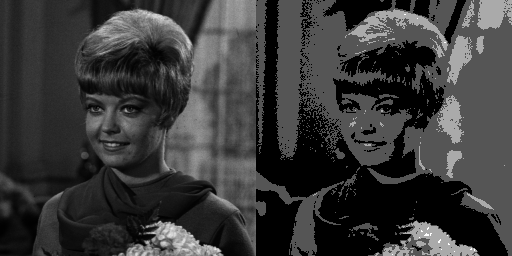

In [9]:
# Load Image
original_img_depth = cv.imread('/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Melakukan perhitungan nilai level untuk kuantisasi citra
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)

# Membuat array untuk depth image
depth_image = np.zeros(original_img_depth.shape, original_img_depth.dtype)

# Menghitung kuantisasi image
depth_image = np.uint8(np.round(original_img_depth / level) * level)

# Mengubah channel menjadi rentang 0 - 255
depth_image = np.clip(depth_image, 0, 255)

# Menampilkan hasil
concate_img_depth = cv.hconcat([original_img_depth, depth_image])
cv2_imshow(concate_img_depth)

## Praktikum 3

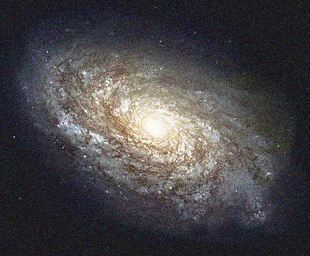

PSNR dengan 5 gambar noise: 28.75059706446807


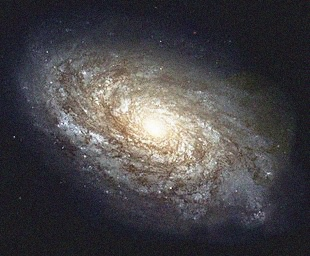

PSNR dengan 10 gambar noise: 28.823638271528452


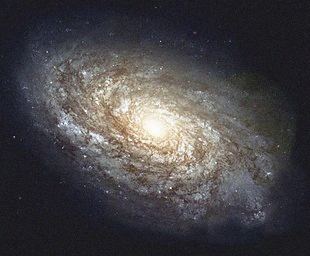

PSNR dengan 20 gambar noise: 28.869606953364737


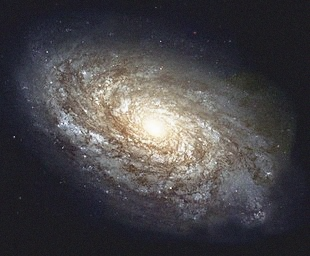

PSNR dengan 40 gambar noise: 28.937334099561905


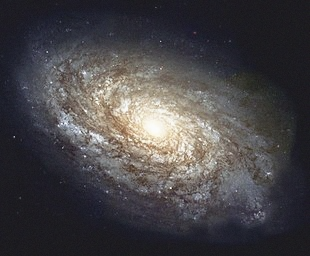

PSNR dengan 80 gambar noise: 28.91514252506282


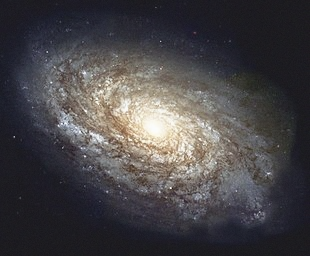

PSNR dengan 100 gambar noise: 28.919389391889432


In [7]:
# Import library glob
import glob

# Buat function untuk load image
def load_image(path, max_img):
  cv_img = []

  for count, img in enumerate(glob.glob(f'{path}/*.jpg')):
    if count >= max_img:
      break
    img = cv.imread(img)
    cv_img.append(img)

  return cv_img

# function untuk denoising image
def denoising_image(images):
  denoised_images = np.array(images)
  average_image = np.mean(denoised_images, axis=0).astype(np.uint8)
  return average_image

# Menghitung PSNR
# Function Menghitung MSE pada gambar
def mse_value(original_image, denoised_image):
  return np.mean((original_image - denoised_image) ** 2)

# Function menghitung PSNR
def psnr_value(original_image, denoised_image):
  mse = mse_value(original_image, denoised_image)
  if(mse == 0):
    return float('inf')
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# Mengambil original image
original_image = '/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/noises/1.jpg'
original_image = cv.imread(original_image)

# Inisialisasi variabel untuk load image
path = '/content/drive/MyDrive/PCVK_Minggu2/Minggu 2/Images/noises'
images_5 = load_image(path, 5)
images_10 = load_image(path, 10)
images_20 = load_image(path, 20)
images_40 = load_image(path, 40)
images_80 = load_image(path, 80)
images_100 = load_image(path, 100)

# Melakukan average denoising dan penghitungan psnr 5 gambar
denoised_image = denoising_image(images_5)
psnr_5 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 5
cv2_imshow(denoised_image)
print(f'PSNR dengan 5 gambar noise: {psnr_5}')


# Melakukan average denoising dan penghitungan psnr 10 gambar
denoised_image = denoising_image(images_10)
psnr_10 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 10
cv2_imshow(denoised_image)
print(f'PSNR dengan 10 gambar noise: {psnr_10}')


# Melakukan average denoising dan penghitungan psnr 20 gambar
denoised_image = denoising_image(images_20)
psnr_20 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 20
cv2_imshow(denoised_image)
print(f'PSNR dengan 20 gambar noise: {psnr_20}')


# Melakukan average denoising dan penghitungan psnr 40 gambar
denoised_image = denoising_image(images_40)
psnr_40 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 40
cv2_imshow(denoised_image)
print(f'PSNR dengan 40 gambar noise: {psnr_40}')


# Melakukan average denoising dan penghitungan psnr 80 gambar
denoised_image = denoising_image(images_80)
psnr_80 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 80
cv2_imshow(denoised_image)
print(f'PSNR dengan 80 gambar noise: {psnr_80}')


# Melakukan average denoising dan penghitungan psnr 100 gambar
denoised_image = denoising_image(images_100)
psnr_100 = psnr_value(original_image, denoised_image)

# Menampilkan hasil Image 100
cv2_imshow(denoised_image)
print(f'PSNR dengan 100 gambar noise: {psnr_100}')

## Kesimpulan Praktikum 3
Dari hasil gambar yang dilakukan average denoising sebanyak 5, 10, 20, dst. dapat disimpulkan bahwa jika kita melakukan average denoising dengan semakin banyak gambar maka hasil dari gambar tersebut akan semakin jernih dibanding dengan sedikit gambar yang dilakukan denoising.

# Praktikum 4